<IPython.core.display.Javascript object>


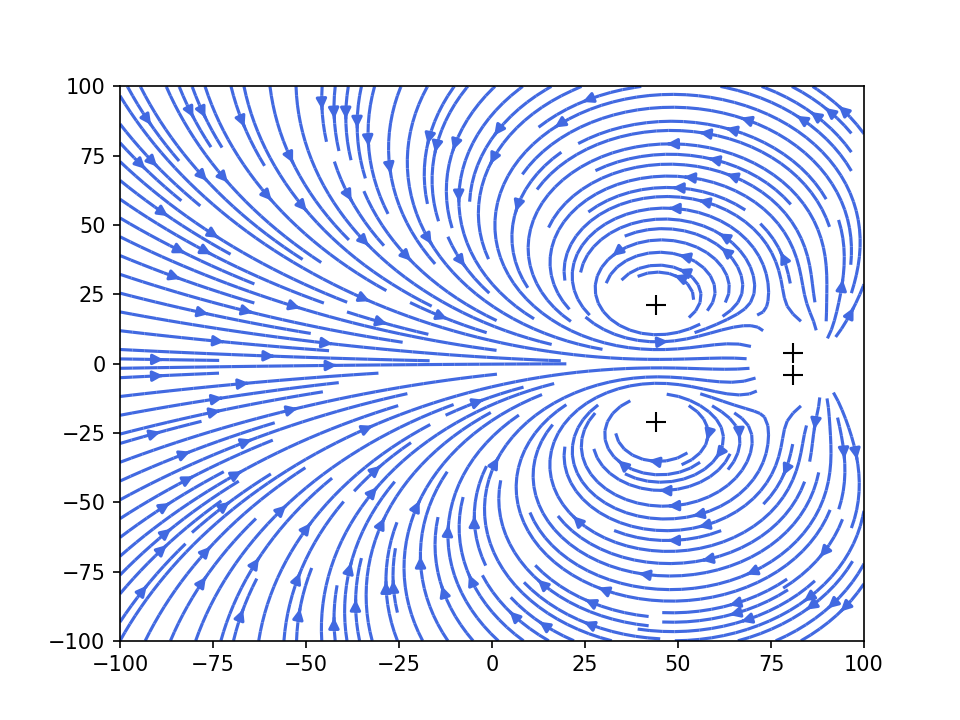

In [16]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  3 20:21:18 2022

@author: Amalia Karalis

@collab: Jasmine Parsons
"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

dt = 50 # choose an appropriate timestep
Nsteps = 25 # choose an appropriate number of total timesteps

## Setting up initial conditions (vortex centers and circulations)
# Vortex rings
y_v = np.array([-25, -25, 25, 25]) # the y positions of the 4 vortices
x_v = np.array([-25, 25, -25, 25]) # the x positions of the 4 vortices
k_v = np.array([-1, -1, 1, 1]) # the line vortex constant k of the 4 vortices

# Setting up the plot
plt.ion()
fig, ax = plt.subplots(1,1)
# mark the initial positions of vortices
p, = ax.plot(x_v, y_v, 'k+', markersize=10)

#draw the initial velocity streamline

ngrid = 100 # the dimensions of the simulation grid
Y, X = np.mgrid[-ngrid:ngrid:360j, -ngrid:ngrid:360j] #360j sets the resolution of the cartesian grid
vel_x = np.zeros(np.shape(X)) # this holds the x-velocity
vel_y = np.zeros(np.shape(Y)) # this holds the y-velocity

# masking radius for better visualization of the vortex centers
r_mask = 10 # the radius for the mask around the vortex centers
# within this mask, the streamlines are not plotted
# so that the movement of the vortex centers can be seen more clearly
for i in range(len(x_v)): # looping over each vortex
    # computing the total velocity field
    # u = k / r phi-hat 
    # for each point in the grid
    x_dist = X - x_v[i] 
    y_dist = Y - y_v[i] 
    r = np.sqrt((x_dist)**2 + (y_dist)**2) # the distance from the center of the vortex to the point
    theta = np.arctan2(y_dist, x_dist) # the angle of the velocity 
    u = k_v[i] / r # the magnitude of the velocity at that location
    vel_x += u*(-np.sin(theta)) # the x-coordinate of the velocity at that location
    vel_y += u*(np.cos(theta))  # the y-coordinate of the velocity at that location

# set the masking area to NaN
r = np.zeros(len(vel_x))
masked_vel_x = np.copy(vel_x)
masked_vel_y = np.copy(vel_y)
for i in range(len(x_v)):
    r = np.sqrt((x_v[i] - X)**2 + (y_v[i] - Y)**2)
    # within the masking area, do not plot the streamlines
    masked_vel_x[r < r_mask] = np.nan
    masked_vel_y[r < r_mask] = np.nan
    
# set up the boundaries for of the simulation box
ax.set_xlim([-ngrid, ngrid])
ax.set_ylim([-ngrid, ngrid])

# initial plot of the streamlines
ax.streamplot(X, Y, masked_vel_x, masked_vel_y, density=[2,2], color='royalblue')

fig.canvas.draw()

# Evolution
count = 0
while count < Nsteps:
    ## Compute the advection velocity due to each vortex
    # initialize an array for the advection velocities
    adv_vel_x = np.zeros(len(x_v))
    adv_vel_y = np.zeros(len(x_v))
    # loop over each of the vortices
    for i in range(len(x_v)):
        # consider the contribution from each vortex 
        for j in range(len(x_v)):
            # except the one we're looking at
            if j != i:
                # the distance from the center of the vortex for which we are calculating the velocity (i)
                # to the other vortex (j)
                xdist = x_v[i] - x_v[j]
                ydist = y_v[i] - y_v[j]
                r = np.sqrt(xdist**2 + ydist**2) 
                theta = np.arctan2(ydist, xdist)
                u = k_v[j] / r # the magnitude of the velocity at that location
                velx = u*(-np.sin(theta))
                adv_vel_x[i] += velx # the x-coordinate of the velocity at that location
                adv_vel_y[i] += u*(np.cos(theta)) # the y-coordinate of the velocity at that location

    for i in range(len(x_v)):
        x_v[i] += adv_vel_x[i] * dt # update the position of the vortices
        y_v[i] += adv_vel_y[i] * dt 
        
    # re-initialize the total velocity field
    vel_x = 0*(vel_x)
    vel_y = 0*(vel_y)
    
    # update the streamlines and masking
    r = np.zeros(len(vel_x))
    masked_vel_x = np.copy(vel_x)
    masked_vel_y = np.copy(vel_y)

    for i in range(len(x_v)): # looping over each vortex
        # computing the total velocity field
        # u = k / r phi-hat 
        # for each point in the grid
        x_dist = X - x_v[i] 
        y_dist = Y - y_v[i] 
        r = np.sqrt((x_dist)**2 + (y_dist)**2) # the distance from the center of the vortex to the point
        theta = np.arctan2(y_dist, x_dist) # the angle of the velocity 
        u = k_v[i] / r # the magnitude of the velocity at that location
        vel_x += u*(-np.sin(theta)) # the x-coordinate of the velocity at that location
        vel_y += u*(np.cos(theta))  # the y-coordinate of the velocity at that location
    
    # update the masking velocity
    masked_vel_x = np.copy(vel_x)
    masked_vel_y = np.copy(vel_y)
    for i in range(len(x_v)):
        r = np.sqrt((x_v[i] - X)**2 + (y_v[i] - Y)**2)
        masked_vel_x[r < r_mask] = np.nan
        masked_vel_y[r < r_mask] = np.nan
        
    
    # the following two lines clear out the previous streamlines
    ax.collections = []
    ax.patches = []
    
    p.set_xdata(x_v)
    p.set_ydata(y_v)
    
    ax.streamplot(X, Y, masked_vel_x, masked_vel_y, density=[2,2], color='royalblue')
    
    fig.canvas.draw()
    plt.pause(0.00000001) # delay time
    count += 1



